In [1]:
import pandas as pd

In [2]:
df = pd.read_json("video2_result.json")

In [3]:
df

,car_id,timestamp,state
0,10,2024-02-17 13:50:00.066667,up
1,9,2024-02-17 13:50:00.066667,up
2,7,2024-02-17 13:50:00.066667,down
3,6,2024-02-17 13:50:00.066667,up
4,5,2024-02-17 13:50:00.066667,up
...,...,...,...
13575,302,2024-02-17 13:50:40.666667,down
13576,297,2024-02-17 13:50:40.666667,up
13577,295,2024-02-17 13:50:40.666667,up
13578,289,2024-02-17 13:50:40.666667,down


In [4]:
df_group_by_state = df.groupby(['state'])

In [5]:
df_group_by_state.count()

,car_id,timestamp
state,,
down,5656,5656
left_lane_change,56,56
right_lane_change,13,13
up,7855,7855


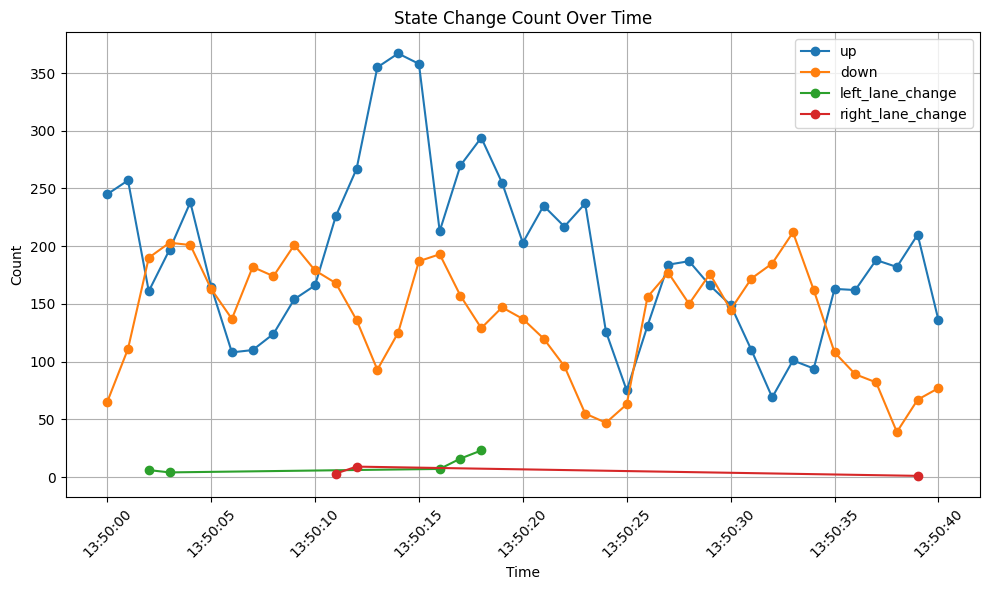

In [11]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

with open('video2_result.json', 'r') as f:
    data = json.load(f)


timestamps = defaultdict(lambda: defaultdict(int))

for entry in data:
    timestamp = datetime.strptime(entry['timestamp'].split('.')[0], '%Y-%m-%d %H:%M:%S')
    state = entry['state']
    timestamps[state][(timestamp.year, timestamp.month, timestamp.day, timestamp.hour, timestamp.minute, timestamp.second)] += 1

plt.figure(figsize=(10, 6))

for state, values in timestamps.items():
    x = []
    y = []
    for timestamp, count in sorted(values.items()):
        x.append(datetime(*timestamp))
        y.append(count)
    plt.plot(x, y, marker='o', linestyle='-', label=state)

plt.title('State Change Count Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


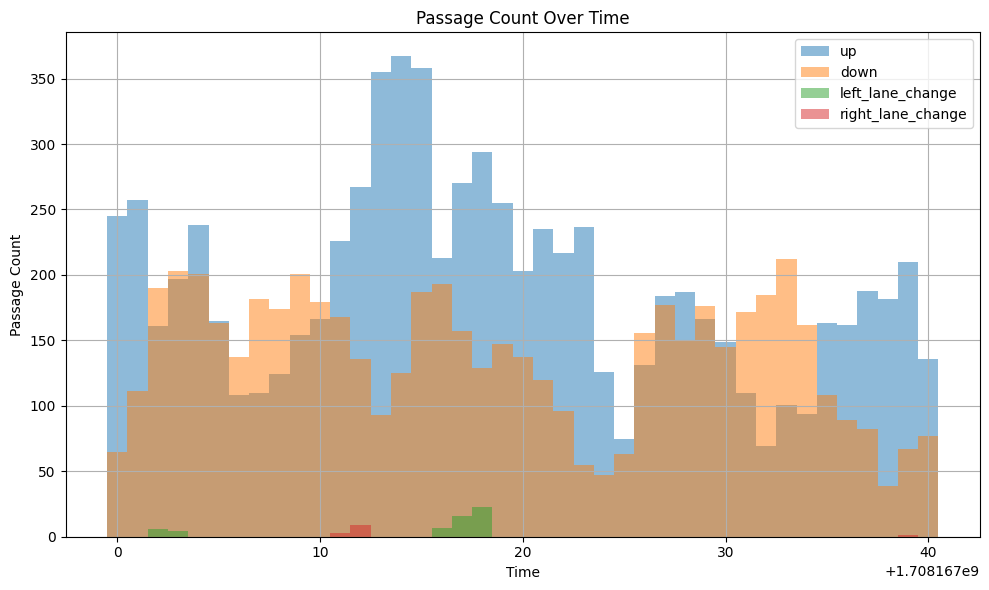

In [10]:
timestamps = defaultdict(lambda: defaultdict(int))


for entry in data:
    timestamp = datetime.strptime(entry['timestamp'].split('.')[0], '%Y-%m-%d %H:%M:%S')
    state = entry['state']
    timestamps[state][timestamp] += 1


all_timestamps = []
for state in timestamps.values():
    all_timestamps.extend(state.keys())


min_time = min(all_timestamps)
max_time = max(all_timestamps)


plt.figure(figsize=(10, 6))
for state, values in timestamps.items():
    x = [time for time in range(int(min_time.timestamp()), int(max_time.timestamp()) + 1)]
    y = [values.get(datetime.fromtimestamp(time), 0) for time in x]
    plt.bar(x, y, width=1, alpha=0.5, label=state)

plt.title('Passage Count Over Time')
plt.xlabel('Time')
plt.ylabel('Passage Count')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


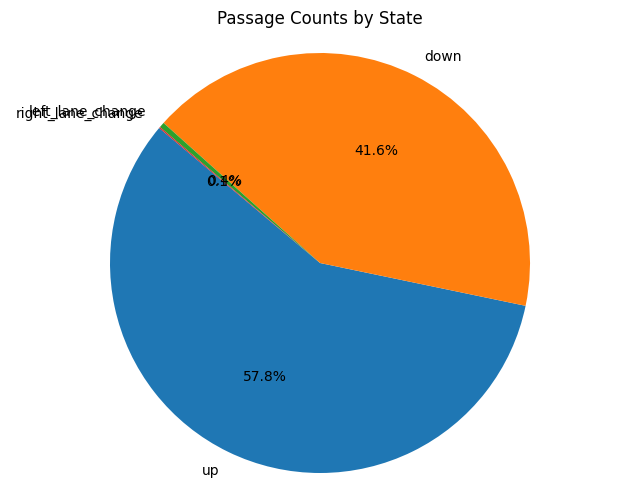

In [9]:
state_counts = defaultdict(int)


for entry in data:
    state = entry['state']
    state_counts[state] += 1


plt.figure(figsize=(8, 6))
plt.pie(state_counts.values(), labels=state_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Passage Counts by State')
plt.axis('equal')
plt.show()


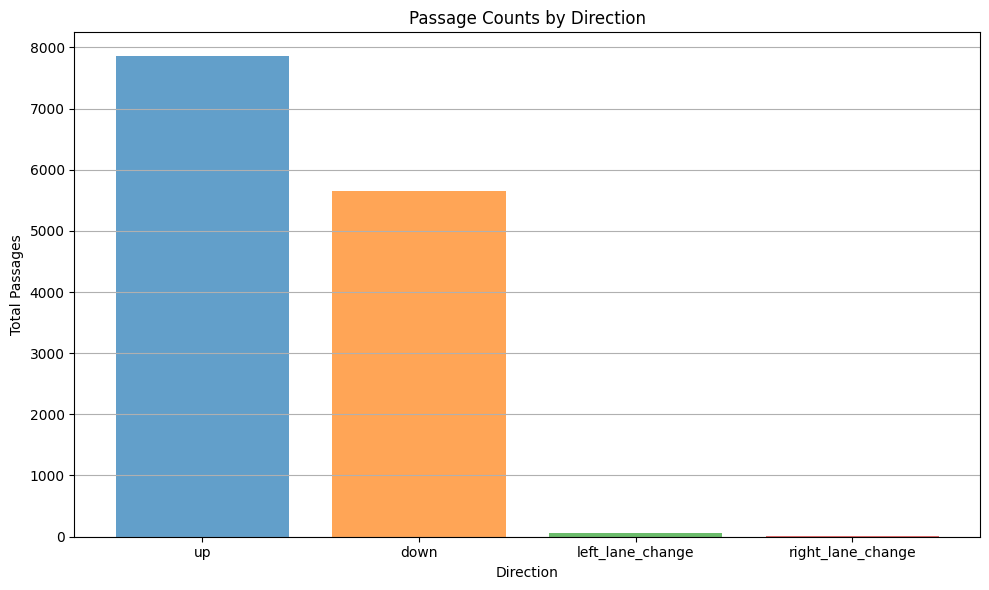

In [8]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

with open('video2_result.json', 'r') as f:
    data = json.load(f)


state_counts = defaultdict(lambda: defaultdict(int))


for entry in data:
    state = entry['state']
    state_counts[state]['total_passages'] += 1


plt.figure(figsize=(10, 6))

for direction, state_counts in state_counts.items():
    total_passages = state_counts['total_passages']
    plt.bar(direction, total_passages, alpha=0.7)

plt.title('Passage Counts by Direction')
plt.xlabel('Direction')
plt.ylabel('Total Passages')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
